In [1]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/analysis_helpers.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from pandas import np


In [2]:
runs_bp_smo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["bp_smo_canceled", "least_confident", "kmeans",10, 30, 0.01, "Adam",10])
print(len(runs_bp_smo))
#all_run_ids_smo = get_run_ids(runs_bp_smo)
run_ids_smo = get_run_ids(runs_bp_smo.head(5))
#nochmal mit tail ausgeben und schauen, ob es einen großen Unterschied macht

10


In [3]:
runs_bp_lmo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.beta"],[True, True, True, True, True, True],["bp_lmo_canceled", "least_confident", "kmeans", 30, 0.01, 10])
print(len(runs_bp_lmo))
#run_ids_bp_lmo = get_run_ids(runs_bp_lmo)
run_ids_bp_lmo = get_run_ids(runs_bp_lmo.head(5))
run_ids_bp_lmo

10


0    e97242c180f34f8598f7e00223811fb2
1    b842e74296664e36879040ccfedf0c3f
2    9db06d9d3a1e42dda454864931348c09
3    b66d3b11412c4af0b644e65b1acda174
4    f12d5c7aca404170a3e6c406f74ea990
Name: run_id, dtype: object

In [4]:
runs_centroids = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["centroids", "least_confident", "kmeans",1000, 30, 0.01, "Adam", 10])
print(len(runs_centroids))
#run_ids_centroids = get_run_ids(runs_centroids)
run_ids_centroids = get_run_ids(runs_centroids.head(5))
run_ids_centroids

10


0    659713574d434f98b7cf8f58aae40a80
1    f9349f0e03e74036957c529bf5fb87df
2    a1b14d0eecac45afaf980f80892b1500
3    af97912132004ed08089445ab34297e3
4    e430b020c5f24aa99cc5079109c4fc99
Name: run_id, dtype: object

In [5]:
runs_bp_clusterwise = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["bp_prop_clustersize", "least_confident", "kmeans",1000, 30, 0.01, 10, 10])
print(len(runs_bp_clusterwise))
#run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise)
run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise.head(5))
run_ids_bp_clusterwise

10


0    051d3b6ce0cc406e9a29c6b83e41c86f
1    5b2eeb945b864f18867f6f2e7a6eeb98
2    8bc5f5bc7413472f87a5a7e680b23ea1
3    1956f7173229436dac110030cc5bdc92
4    18ae34de12dd45579536c8938a77de64
Name: run_id, dtype: object

In [6]:
runs_boundary = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["boundary_points", "least_confident", "kmeans",1000, 0.01, 30, 10, 10])
print(len(runs_boundary))
#run_ids_boundary = get_run_ids(runs_boundary)
run_ids_boundary = get_run_ids(runs_boundary.head(5))
run_ids_boundary

10


0    721131bc8cf64ea6aa5a1c80247a94c1
1    c99010070201466b952be8a07c9c4a7a
2    5d95b94a13d64ac6aa291ff5b15dc47a
3    9f07d89075434e9b83697f24e7d10d27
4    f84e0503bbce4e68b796d5150384cae7
Name: run_id, dtype: object

In [9]:
runs_random = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size"],[True, True, True, True],["random", 0.01, 30, 1000])
print(len(runs_random))
#run_ids_random = get_run_ids(runs_random)
run_ids_random = get_run_ids(runs_random.head(5))
run_ids_random

10


0    7f1e5628b6334cc3a9de37e61104358d
1    421ff61556e5461f97a973fa111c3c63
2    ae5681ec87874fbda5bd998ad8c13970
3    1437f6a0f73a4039ad88d8c63b54f84c
4    d2a0054c9b594e3cb78e9adb27ac6157
Name: run_id, dtype: object

In [10]:
runs_random_uncertainty = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size", "params.beta", "params.uncertainty"],[True, True, True, True, True, True],["random_uncertainty", 0.01, 30, 1000, 10, "least_confident"])
print(len(runs_random_uncertainty))
#run_ids_random = get_run_ids(runs_random)
run_ids_random_uncertainty = get_run_ids(runs_random_uncertainty.head(5))
run_ids_random_uncertainty

10


0    3e4aa56c74f040419a3e10478a8821ef
1    f638f1adedb34f3983bd522bb6355803
2    d66f99ac1d23433e87965cff999908ab
3    892d80c15a5540989f0205fc8a1e43a1
4    b82bdc76575748129621c2524d083563
Name: run_id, dtype: object

In [11]:
samples_labeled_bp_smo, avg_accs_bp_smo = get_labeledSamples_avgAcc(run_ids_smo, tracking)
samples_labeled_bp_lmo, avg_accs_bp_lmo = get_labeledSamples_avgAcc(run_ids_bp_lmo, tracking)
samples_labeled_centroids, avg_accs_centroids = get_labeledSamples_avgAcc(run_ids_centroids, tracking)
samples_labeled_clusterwise, avg_accs_clusterwise = get_labeledSamples_avgAcc(run_ids_bp_clusterwise, tracking)
samples_labeled_boundary, avg_accs_boundary = get_labeledSamples_avgAcc(run_ids_boundary, tracking)
samples_labeled_random, avg_accs_random = get_labeledSamples_avgAcc(run_ids_random, tracking)
samples_labeled_random_uncertain, avg_accs_random_uncertain = get_labeledSamples_avgAcc(run_ids_random_uncertainty, tracking)

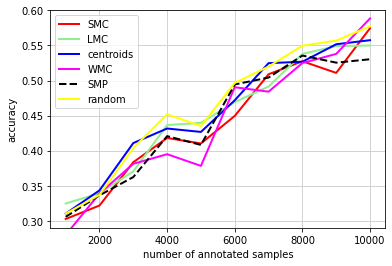

In [12]:
# plot
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='red', label='SMC', linewidth=2)
plt.plot(samples_labeled_bp_lmo, avg_accs_bp_lmo,color='lightgreen', label='LMC', linewidth=2)
plt.plot(samples_labeled_centroids, avg_accs_centroids,color='blue', label='centroids', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='WMC', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='SMP', linestyle='--',linewidth=2)
plt.plot(samples_labeled_random, avg_accs_random,color='yellow', label='random',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])

plt.show()

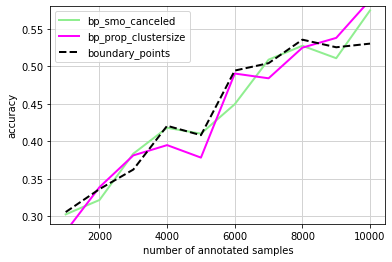

In [13]:
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='lightgreen', label='bp_smo_canceled', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='bp_prop_clustersize', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='boundary_points', linestyle='--',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [14]:
print(f'bp_smo: {avg_accs_bp_smo}')
print(f'bp_lmo: {avg_accs_bp_lmo}')

bp_smo: [0.30256 0.32174 0.38352 0.41806 0.4102  0.44952 0.50892 0.52744 0.51084
 0.57456]
bp_lmo: [0.32456 0.33936 0.37046 0.43648 0.43958 0.4693  0.49142 0.53782 0.54906
 0.54988]


In [15]:
avg_accs_centroids

array([0.31016, 0.34332, 0.41082, 0.43154, 0.42668, 0.47182, 0.52474,
       0.52674, 0.55166, 0.55748])

In [16]:
avg_accs_boundary

array([0.30562, 0.33628, 0.36234, 0.4207 , 0.40818, 0.49436, 0.50422,
       0.53558, 0.52544, 0.5303 ])

In [17]:
avg_accs_bp_smo

array([0.30256, 0.32174, 0.38352, 0.41806, 0.4102 , 0.44952, 0.50892,
       0.52744, 0.51084, 0.57456])

In [18]:
avg_accs_bp_lmo

array([0.32456, 0.33936, 0.37046, 0.43648, 0.43958, 0.4693 , 0.49142,
       0.53782, 0.54906, 0.54988])

In [19]:
avg_accs_clusterwise

array([0.27972, 0.33886, 0.38124, 0.39494, 0.37828, 0.4904 , 0.48406,
       0.52492, 0.53794, 0.58846])

In [20]:
avg_accs_random

array([0.31016, 0.33688, 0.40374, 0.45186, 0.43506, 0.49656, 0.51994,
       0.54958, 0.55688, 0.57726])

In [21]:
avg_accs_random_uncertain

array([0.29812, 0.30822, 0.40064, 0.43942, 0.4214 , 0.46528, 0.50886,
       0.5347 , 0.55396, 0.55926])